In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, InputLayer

print(tf.version.VERSION)

2.10.0


## Read data


In [4]:
# load data
data = pd.read_csv("../../data/csv/TMNIST_Data.csv", header=0)
data

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# normalize and split Data


In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns={"names", "labels"}, axis=1)
X = X.values.reshape(-1, 28, 28, 1) / 255.0  # normalize and reshape to square
# X = 1 - X  # invert colors
y = data["labels"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23920, 28, 28, 1)
(23920,)
(5980, 28, 28, 1)
(5980,)


## show sample


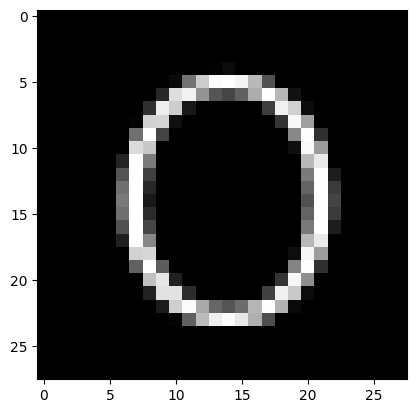

In [5]:
sample_image = X_train[1]

# Plot the image
plt.imshow(sample_image, cmap="gray")
plt.show()

## Hyperparameters


In [6]:
batch_size = 128
num_classes = 10
epochs = 6
learning_rate = 0.001

## Model Structure


In [7]:
# create model
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Flatten())  # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation="softmax"))  # no softmax for thresholding

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

## set compiler


In [8]:
# compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

## train model


In [9]:
# train model
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/6
187/187 [==============================] - 7s 33ms/step - loss: 0.2457 - accuracy: 0.9311 - val_loss: 0.0793 - val_accuracy: 0.9778
Epoch 2/6
187/187 [==============================] - 6s 31ms/step - loss: 0.0650 - accuracy: 0.9809 - val_loss: 0.0528 - val_accuracy: 0.9865
Epoch 3/6
187/187 [==============================] - 6s 32ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0411 - val_accuracy: 0.9891
Epoch 4/6
187/187 [==============================] - 6s 31ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0364 - val_accuracy: 0.9903
Epoch 5/6
187/187 [==============================] - 6s 32ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0512 - val_accuracy: 0.9858
Epoch 6/6
187/187 [==============================] - 6s 31ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0391 - val_accuracy: 0.9906


## Evaluate loss and accuracy


In [10]:
# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1] * 100)

Test loss: 0.03907255455851555
Test accuracy: 99.06354546546936


## plot loss and accuracy to check for over/underfitting


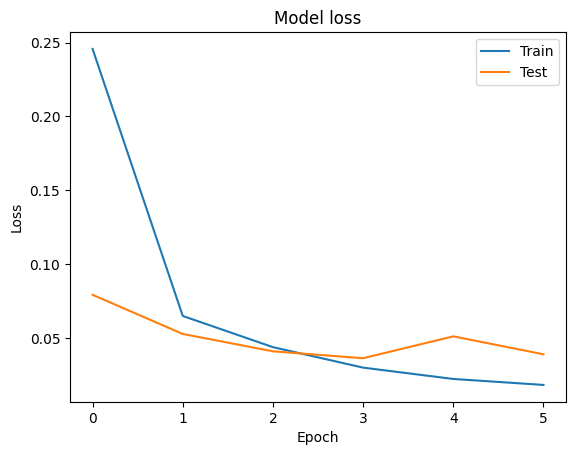

In [11]:
# plot training and test loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

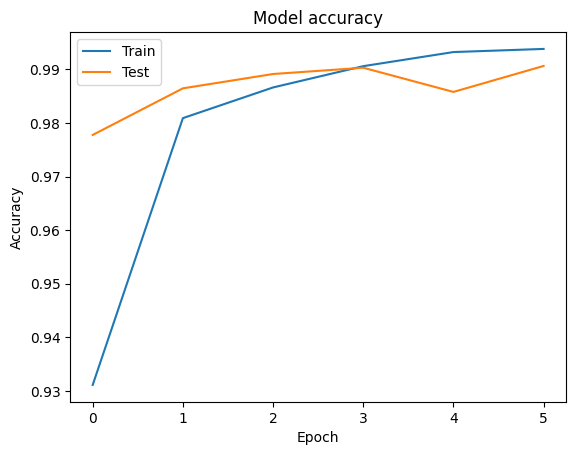

In [12]:
# plot training and test accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

## use model to predit on test sample


In [13]:
# predict model
predictions = model.predict(X_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[:])  # why is this not indexed from 0?

187/187 [==============================] - 1s 3ms/step
[5.2979343e-14 1.3358090e-12 6.7645625e-11 1.0000000e+00 1.1930410e-16
 1.2300604e-12 1.2443385e-17 1.0534604e-11 8.2652558e-11 6.0248090e-10]
3
15756    3
19617    5
18973    8
16397    9
16366    0
        ..
708      9
23587    8
27362    3
20592    8
9934     5
Name: labels, Length: 5980, dtype: int64


## save model to models folder


In [14]:
# save model
model.save("../models/TMNIST_model.keras")